<a href="https://colab.research.google.com/github/srustiphirangi/LWR01/blob/main/LWR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

In [ ]:
db = pd.read_csv('housing.csv')
db.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
X = db[['housing_median_age']].values
Y = db['median_house_value'].values

In [ ]:
X_Query = np.array([41]); # Predicting for this input
tau = 0.1 #bandwidth parameter
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for a house with 30 years old: {y_query}")

Predicted median house value for a house with 30 years old: 197253.77364864876


Predicted median house value for housing median age 10: 193923.82789030776
Predicted median house value for housing median age 20: 198521.40640040388
Predicted median house value for housing median age 30: 205106.16873237348
Predicted median house value for housing median age 40: 214431.02664171837
Predicted median house value for housing median age 50: 242024.36162520997


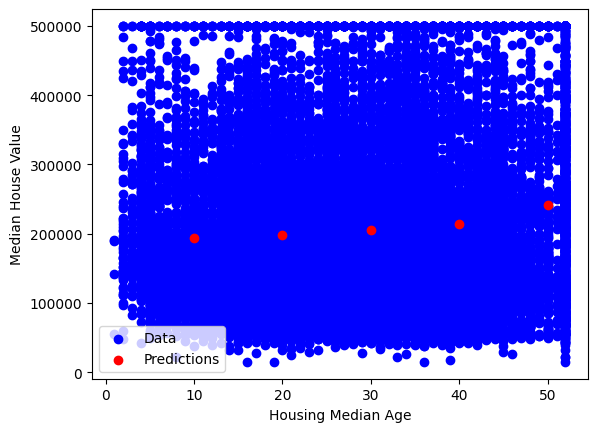

In [ ]:
# Predict for multiple x_query values
x_queries = np.array([10, 20, 30, 40, 50])  # Replace with your desired query points
predictions = []

for x_query in x_queries:
    x_query = np.array([x_query])  # Ensure x_query is a 1D array
    y_query = locally_weighted_regression(X, Y, tau=10, x_query=x_query)
    predictions.append(y_query)
    print(f"Predicted median house value for housing median age {x_query[0]}: {y_query}")

# Optionally, visualize the predictions
plt.scatter(X, Y, color='blue', label='Data')
plt.scatter(x_queries, predictions, color='red', label='Predictions')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()